# Instagram Influencers

## Importing Libraries 

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Loading Dataset 

In [53]:
# load the data
df=pd.read_csv("G:\\Arun\\DS23\\DS\\project4\\influencer.csv")
df.sample(5)

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
99,100,\nkritisanon,76,51.0m,891.5k,2.7k,0.011,539.1k,2.4b,India
154,155,\naddisonraee,85,39.8m,3.1m,328,0.022,851.5k,1.0b,NaN
53,54,\nronaldinho,78,68.1m,868.9k,3.0k,0.007,480.1k,2.6b,Brazil
148,149,\njenniferaniston,85,40.8m,4.3m,104,0.024,949.1k,446.5m,NaN
64,65,\nroses_are_rosie,82,63.5m,4.7m,854,0.073,4.6m,4.0b,NaN


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 200 non-null    int64  
 1   Channel Info         200 non-null    object 
 2   Influence Score      200 non-null    int64  
 3   Followers            200 non-null    object 
 4   Avg. Likes           200 non-null    object 
 5   Posts                200 non-null    object 
 6   60-Day Eng Rate      200 non-null    float64
 7   New Post Avg. Likes  200 non-null    object 
 8   Total Likes          200 non-null    object 
 9   Country Or Region    137 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 15.8+ KB


In [55]:
df.isnull().sum()

Rank                    0
Channel Info            0
Influence Score         0
Followers               0
Avg. Likes              0
Posts                   0
60-Day Eng Rate         0
New Post Avg. Likes     0
Total Likes             0
Country Or Region      63
dtype: int64

## Data Cleaning

In [57]:
df['Channel Info'] = df['Channel Info'].str.replace('\n','')
df.sample(5)

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
55,56,bts.bighitofficial,78,68.1m,4.1m,1.2k,0.041,2.8m,5.0b,Uruguay
184,185,ivetesangalo,84,35.1m,226.4k,7.7k,0.004,121.1k,1.7b,Brazil
83,84,bellahadid,79,55.1m,1.2m,3.2k,0.020,1.1m,3.7b,United Kingdom
121,122,5-Minute Crafts GIRLY,85,46.2m,155.4k,10.0k,0.001,60.4k,1.6b,United States
111,112,jokowi,85,48.5m,445.7k,3.7k,0.004,199.8k,1.6b,NaN


In [58]:
# Convert m,k,b numeric
number_list = ['Followers', 'Avg. Likes', 'Posts', 'New Post Avg. Likes', 'Total Likes']
tbl = {'k': 1000, 'm': 1000000, 'b': 1000000000}

for col in number_list:
    lst = df[col]
    df[col] = [int(re.sub(r'([\d\.]+)(k|m|b)', lambda v: str(int(float(v.groups()[0]) * tbl[v.groups()[1]])), str(val))) for val in lst]

In [59]:
df[df['Country Or Region']=='United States']

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
1,2,kyliejenner,91,370700000,8199999,7000,0.014,5000000,57400000000,United States
3,4,selenagomez,93,348800000,6100000,1900,0.005,1700000,11400000000,United States
4,5,therock,91,339400000,1800000,6800,0.003,932000,12600000000,United States
5,6,arianagrande,92,333000000,3700000,5000,0.009,3100000,18500000000,United States
6,7,kimkardashian,91,330700000,3500000,5700,0.005,1700000,19800000000,United States
...,...,...,...,...,...,...,...,...,...,...
178,179,blakelively,80,35900000,3100000,120,0.040,1400000,366100000,United States
183,184,barackobama,81,35400000,1100000,682,0.012,411500,758400000,United States
187,188,disney,77,34700000,185200,7500,0.004,132000,1400000000,United States
188,189,shaymitchell,83,34500000,715400,6300,0.006,198700,4500000000,United States


In [60]:
df.head()

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,cristiano,92,485200000,8700000,3400,0.013,6300000,29100000000,Spain
1,2,kyliejenner,91,370700000,8199999,7000,0.014,5000000,57400000000,United States
2,3,leomessi,90,363900000,6700000,915,0.010,3500000,6100000000,NaN
3,4,selenagomez,93,348800000,6100000,1900,0.005,1700000,11400000000,United States
4,5,therock,91,339400000,1800000,6800,0.003,932000,12600000000,United States


In [61]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,200.0,1.005000e+02,5.787918e+01,1.0,5.075000e+01,1.005000e+02,1.502500e+02,2.000000e+02
Influence Score,200.0,8.185000e+01,8.875323e+00,22.0,8.000000e+01,8.400000e+01,8.600000e+01,9.300000e+01
Followers,200.0,7.849100e+07,7.492015e+07,33400000.0,4.067500e+07,5.095000e+07,7.050000e+07,4.852000e+08
Avg. Likes,200.0,1.785050e+06,2.192133e+06,63500.0,4.990500e+05,1.100000e+06,2.125000e+06,1.540000e+07
Posts,200.0,3.460425e+03,3.327882e+03,20.0,9.382500e+02,2.100000e+03,5.025000e+03,1.690000e+04
60-Day Eng Rate,200.0,1.916000e-02,3.257731e-02,0.0,4.000000e-03,9.500000e-03,1.725000e-02,2.500000e-01
New Post Avg. Likes,200.0,1.224083e+06,1.857624e+06,0.0,2.187750e+05,5.671500e+05,1.300000e+06,1.290000e+07
Total Likes,200.0,3.644949e+09,5.563069e+09,22800000.0,1.075000e+09,2.050000e+09,4.025000e+09,5.740000e+10


## 1.Are there any correlated features in the given dataset? If yes, state the correlation
## coefficient of the pair of features which are highly correlated.

In [62]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Find highly correlated feature pairs
highly_correlated = correlation_matrix[abs(correlation_matrix) > 0.7].stack().drop_duplicates()

# Print the highly correlated feature pairs and their correlation coefficients
print("Highly correlated features:")
for (feature1, feature2), correlation in highly_correlated.items():
    if feature1 != feature2:
        print(f"{feature1} - {feature2}: {correlation}")

Highly correlated features:
Avg. Likes - 60-Day Eng Rate: 0.7893592870319373
Avg. Likes - New Post Avg. Likes: 0.892784044147688
60-Day Eng Rate - New Post Avg. Likes: 0.8662931593102474


C:\Users\SONY\AppData\Local\Temp\ipykernel_9324\3823018520.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


C:\Users\SONY\AppData\Local\Temp\ipykernel_9324\610790736.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


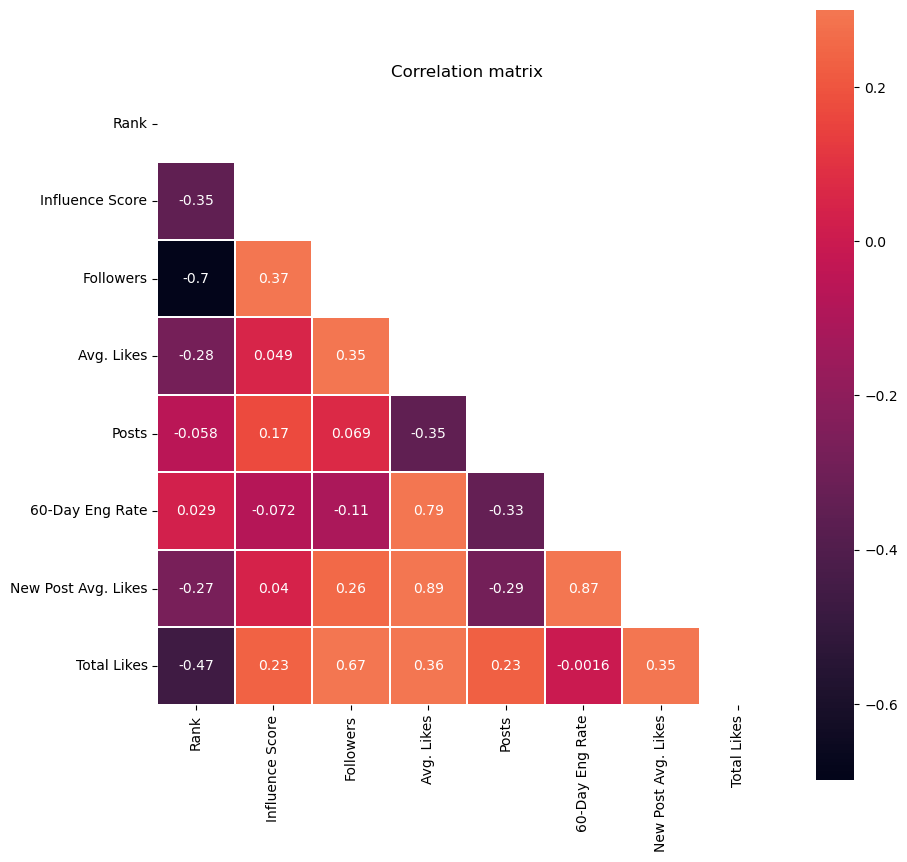

In [81]:
cmap = 'rocket' 
plt.figure(figsize=(10, 10))
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
g = sns.heatmap(corr, annot=True, mask=mask, vmax=0.3, center=0, cmap=cmap, square=True, linewidths=0.05)
p = plt.title('Correlation matrix')
None

## 2. What is the frequency distribution of the following features?
## ○ Influence Score
## ○ Followers
## ○ Posts 

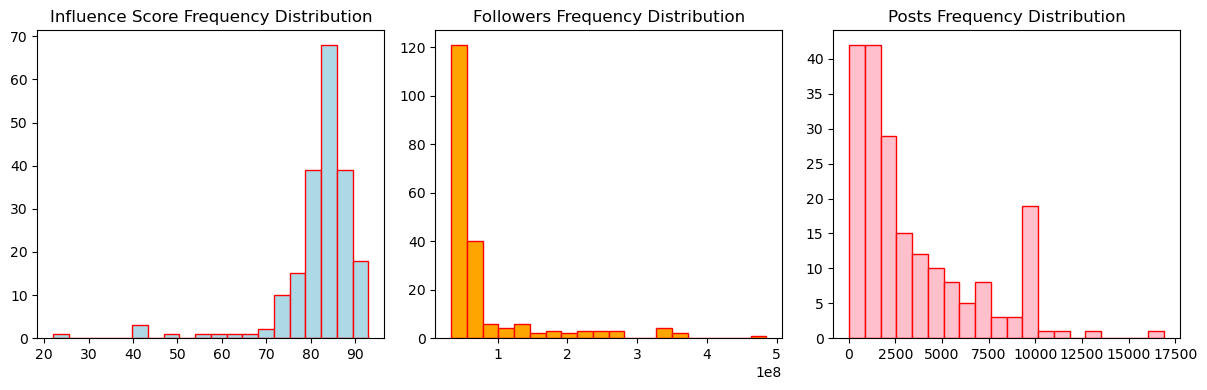

In [93]:
#  Frequency distribution
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
features = ['Influence Score', 'Followers', 'Posts']
colors = ['lightblue', 'orange', 'pink']

for i, feature in enumerate(features):
    ax = axes[i]
    ax.hist(df[feature], bins=20, color=colors[i], ec='red')
    ax.set_title(f'{feature} Frequency Distribution')
plt.tight_layout()
plt.show()

## 3. Which country houses the highest number of Instagram Influencers? Please show the
## count of Instagram influencers in different countries using barchart 

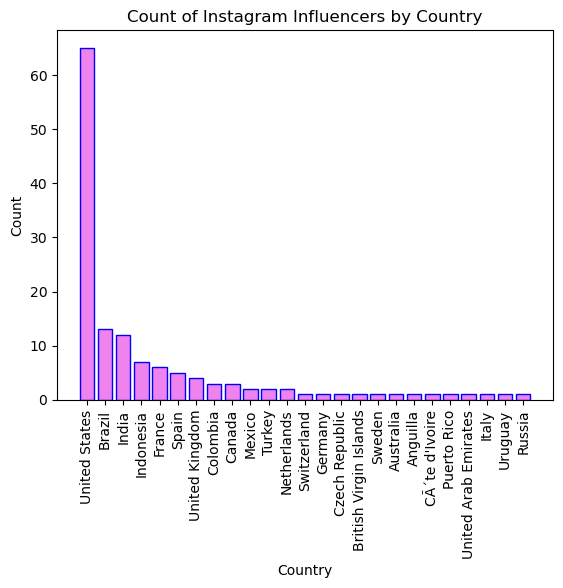

In [99]:
# Count of influencers by country
country_counts = df['Country Or Region'].value_counts()
plt.bar(country_counts.index, country_counts.values, color='violet', ec='blue')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Count of Instagram Influencers by Country')
plt.xticks(rotation=90)
plt.show()

## 4. Who are the top 10 influencers in the given dataset based on the following features 

###  Top 10 Followers

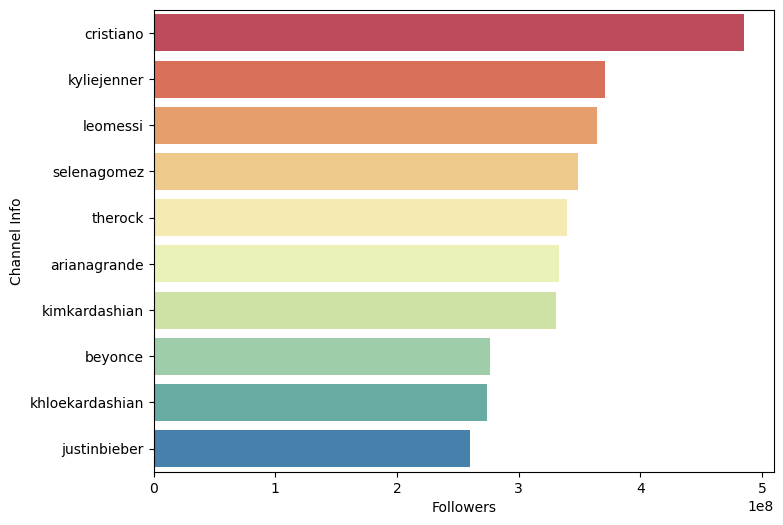

In [68]:
# Top 10 Followers
dfi = df.loc[:9]
plt.figure(figsize=(8,6))
sns.barplot(data=dfi, y="Channel Info", x="Followers", palette="Spectral")
None

### Top 10 Average Likes 

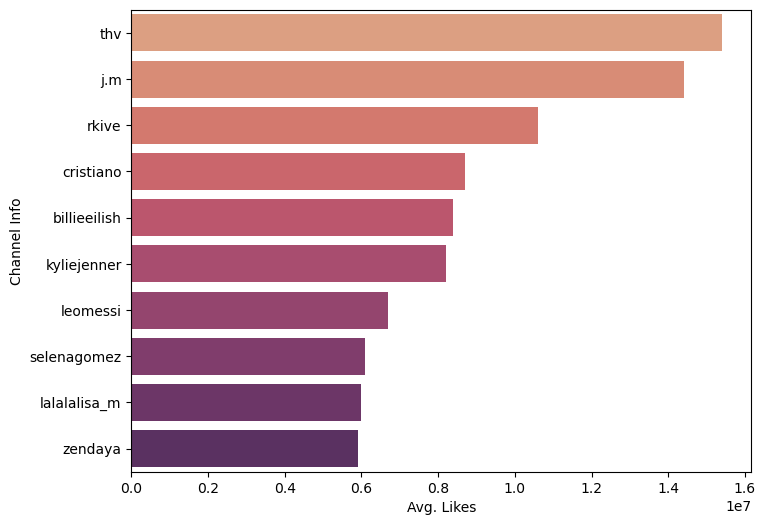

In [69]:
# Top 10 Averag Likes
dfx = df.sort_values(by='Avg. Likes' , ascending=False)[0:10]
plt.figure(figsize=(8,6))
sns.barplot(data=dfx, y="Channel Info", x='Avg. Likes', palette="flare")
None

### Top  10 Total Likes

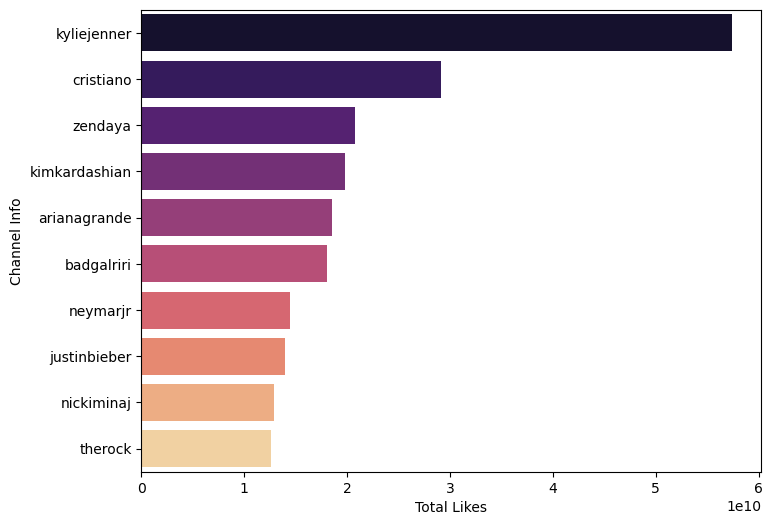

In [70]:
#  Top  10 Total Likes
dfx = df.sort_values(by='Total Likes' , ascending=False)[0:10]
plt.figure(figsize=(8,6))
sns.barplot(data=dfx, y="Channel Info", x='Total Likes', palette="magma")
None

## 5. Describe the relationship between the following pairs of features using a suitable graph
## ● Followers and Total Likes
## ● Followers and Influence Score
## ● Posts and Average likes
## ● Posts and Influence Score 

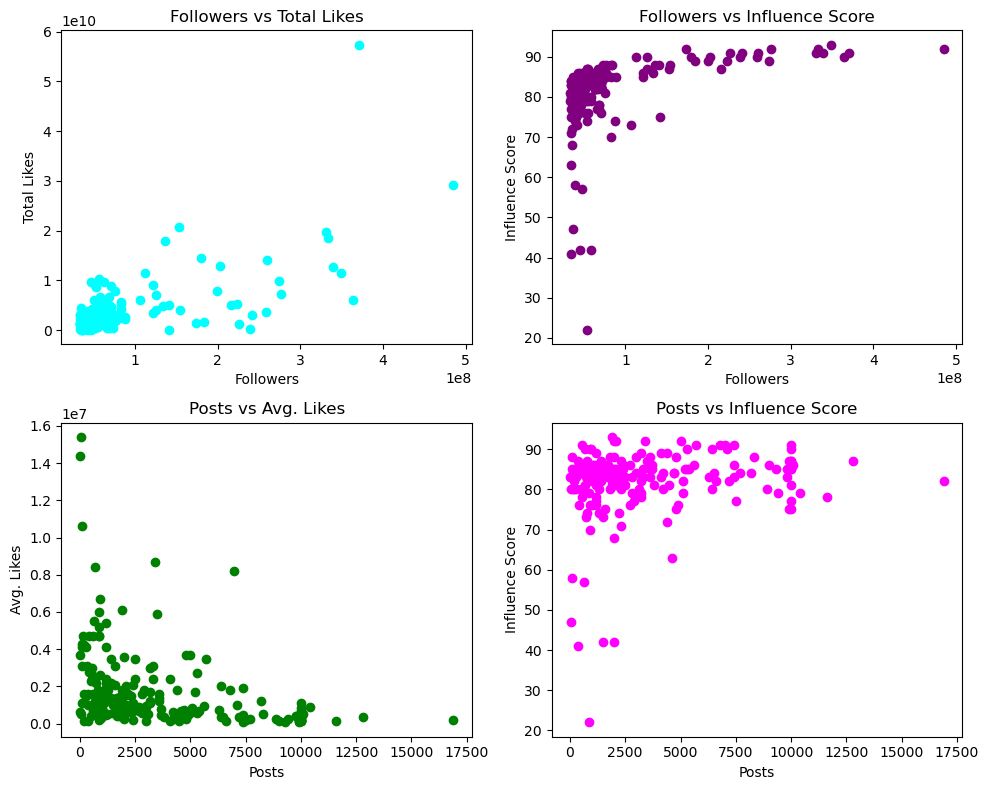

In [73]:
#  Relationship between pairs of features
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
features_pairs = [('Followers', 'Total Likes'),
                 ('Followers', 'Influence Score'),
                 ('Posts', 'Avg. Likes'),
                 ('Posts', 'Influence Score')]
colors = ['cyan', 'purple', 'green', 'magenta'] 

for i, (x, y) in enumerate(features_pairs):
    ax = axes[i // 2, i % 2]
    ax.scatter(df[x], df[y], color=colors[i])
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_title(f'{x} vs {y}')
plt.tight_layout()
plt.show()